## Let's try the OpenAI tokenizer- tiktoken library.

In [1]:
!pip install -q tiktoken

In [2]:
import tiktoken

encoding = tiktoken.encoding_for_model('gpt-4o-mini')

In [3]:
initial_string = 'Darth Vader was born on Tatooine.'

# Tokenization
encoded_string = encoding.encode(initial_string)
print('After tokenization (encoded string): ', encoded_string)

# Tokenization
print('Decoding back: ', encoding.decode(encoded_string))

# Decoding each token:
for token in encoded_string:
    print(f'{token}: "{encoding.decode([token])}"')

After tokenization (encoded string):  [35, 7087, 120316, 673, 12275, 402, 353, 2754, 58552, 13]
Decoding back:  Darth Vader was born on Tatooine.
35: "D"
7087: "arth"
120316: " Vader"
673: " was"
12275: " born"
402: " on"
353: " T"
2754: "ato"
58552: "oine"
13: "."


In [4]:
initial_string = 'D D!D'

# Tokenization
encoded_string = encoding.encode(initial_string)
print('After tokenization (encoded string): ', encoded_string)

# Tokenization
print('Decoding back: ', encoding.decode(encoded_string))

# Decoding each token:
for token in encoded_string:
    print(f'{token}: "{encoding.decode([token])}"')


After tokenization (encoded string):  [35, 415, 0, 35]
Decoding back:  D D!D
35: "D"
415: " D"
0: "!"
35: "D"


In [5]:
python_code = """import pandas as pd
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(df['values'], bins=5, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()"""

# Tokenization
encoded_string = encoding.encode(python_code)

# Decoding each token:
for token in encoded_string[:40]:
    print(f'{token}: {encoding.decode([token])}')

561: import
41942:  pandas
472:  as
15934:  pd
198: 

561: import
39480:  matplotlib
56679: .pyplot
472:  as
14248:  plt
279: 


2: #
50915:  Plot
1744: ting
290:  the
81482:  histogram
198: 

20940: plt
116240: .hist
34339: (df
1181: ['
7222: values
9151: '],
53960:  bins
28: =
20: 5
11: ,
11165:  edge
4991: color
2053: ='
18474: black
2515: ')

20940: plt
81780: .xlabel
706: ('
8278: Values
2515: ')

20940: plt
81430: .ylabel
706: ('


# Checking the tokenizer of an open-source LLM

In [6]:
from transformers import AutoTokenizer

model_name = "Qwen/Qwen2.5-Coder-32B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_name)

prompt = "Darth Vader was born on Tatooine."

tokenizer.tokenize(prompt)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

['D', 'arth', 'ĠVader', 'Ġwas', 'Ġborn', 'Ġon', 'ĠTat', 'oo', 'ine', '.']

## Many models will actually ask you to login to Hugging Face and consent to their terms of use before you can get your hands on them.

In [7]:
from huggingface_hub import notebook_login
notebook_login()

# Tokenization and character-level tasks

In [8]:
initial_string = '12345678'

# Tokenization
encoded_string = encoding.encode(initial_string)
print('After tokenization (encoded string): ', encoded_string)

# Decoding each token:
for token in encoded_string:
    print(f'{token}: {encoding.decode([token])}')

After tokenization (encoded string):  [7633, 19354, 4388]
7633: 123
19354: 456
4388: 78


As you see, LLM doesn't see a large number as a sequence of characters. Instead, it operates with larger chunks of digits. This inevitable makes arithmetics harder for the LLM; just imagine the size of a "mental multiplication table" it should be aware of!

Example:

In [9]:
!pip install -q openai

In [10]:
!pip install -q python-dotenv

In [11]:
import os
from dotenv import load_dotenv

env_path = "/content/drive/MyDrive/api-keys/.env"
load_dotenv(env_path)


nebius_api_key = os.getenv("NEBIUS_API_KEY")
openai_api_key = os.getenv("OPENAI_API_KEY")

print("Keys loaded:", bool(nebius_api_key), bool(openai_api_key))

Keys loaded: True True


In [12]:
from openai import OpenAI

# Nebius uses the same OpenAI() class, but with additional details
client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY"),
)

model = "meta-llama/Meta-Llama-3.1-8B-Instruct"
completion = client.chat.completions.create(
    model=model,
    messages=[
    {
        "role": "system",
        "content": """You're an expert in floating point computations."""
    },
    {
        "role": "user",
        "content": """7.24*19.13 ="""
    },
    ],
    max_tokens=512
)

completion.choices[0].message.content

'A simple multiplication problem involving floating-point numbers.\n\nWhen I evaluate the product of 7.24 and 19.13, I get:\n\n138.4492'

# Practice: Further exploration of the tokenizers


## Task 1- Print the subword unit (a string) corresponding to the token index 10101.

In [15]:
from huggingface_hub import notebook_login
notebook_login()

In [17]:
from transformers import AutoTokenizer

# Load the tokenizer for the model you're using
# Replace the model name with the one you're actually using
tokenizer = AutoTokenizer.from_pretrained("gpt2")

# Get the subword corresponding to token index 10101
subword = tokenizer.convert_ids_to_tokens(10101)

print("Subword unit for token index 10101:", subword)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Subword unit for token index 10101: Ġtemperatures


##  vocabulary size of GPT-4o.

In [18]:
encoding._special_tokens

{'<|endoftext|>': 199999, '<|endofprompt|>': 200018}

In [19]:
import tiktoken

# GPT-4o uses cl100k_base tokenizer
tokenizer = tiktoken.get_encoding("cl100k_base")

excerpts = {
    'English': '''
Once upon a time, in a small village, there lived some kind peasants. They worked hard every day, taking care of their fields and animals. The peasants had cows, chickens, goats, and a big brown dog named Buddy.

Every morning, the peasants woke up early. They fed the chickens, who clucked happily. They milked the cows, who gave them fresh, sweet milk. The goats liked to jump and play, making everyone laugh. Buddy, the dog, helped keep the animals safe.

One day, a storm came. The wind blew hard, and the rain fell heavily. The peasants quickly brought all the animals into the big barn. Inside, it was warm and dry. The cows lay down on the soft hay. The chickens snuggled together on their perch. The goats found a corner to rest, and Buddy lay by the door, watching over everyone.

The storm lasted all night, but the peasants and their animals were safe in the barn. In the morning, the sun came out, and the storm was gone. The peasants opened the barn doors, and the animals went outside, happy and free.

The peasants fixed the fences and cleaned the barn. They worked together, helping each other and their animals. At the end of the day, they sat under a big tree, watching the sunset. Buddy lay at their feet, and the animals grazed nearby.

The village was peaceful, and the peasants were happy. They knew that as long as they took care of their animals and each other, they would always have a good life.

And so, they lived happily ever after.
''',
    'French': '''
Il était une fois, dans un petit village, de gentils paysans. Ils travaillaient dur chaque jour, prenant soin de leurs champs et de leurs animaux. Les paysans avaient des vaches, des poules, des chèvres et un gros chien brun nommé Buddy.

Chaque matin, les paysans se réveillaient tôt. Ils nourrissaient les poules qui glousaient joyeusement. Ils traitaient les vaches qui leur donnaient du lait frais et sucré. Les chèvres aimaient sauter et jouer, faisant rire tout le monde. Buddy, le chien, a aidé à assurer la sécurité des animaux.

Un jour, une tempête est arrivée. Le vent soufflait fort et la pluie tombait abondamment. Les paysans ont rapidement amené tous les animaux dans la grande grange. À l’intérieur, il faisait chaud et sec. Les vaches se couchent sur le foin moelleux. Les poules se blottissaient les unes contre les autres sur leur perchoir. Les chèvres trouvèrent un coin pour se reposer et Buddy resta allongé près de la porte, veillant sur tout le monde.

La tempête a duré toute la nuit, mais les paysans et leurs animaux étaient en sécurité dans la grange. Le matin, le soleil s'est levé et la tempête s'est calmée. Les paysans ouvrirent les portes de la grange et les animaux sortirent, heureux et libres.

Les paysans réparèrent les clôtures et nettoyèrent la grange. Ils ont travaillé ensemble, s'entraidant ainsi que leurs animaux. À la fin de la journée, ils étaient assis sous un grand arbre et regardaient le coucher du soleil. Buddy gisait à leurs pieds et les animaux paissaient à proximité.

Le village était paisible et les paysans étaient heureux. Ils savaient que tant qu’ils prendraient soin de leurs animaux et les uns des autres, ils auraient toujours une belle vie.

Et ainsi, ils vécurent heureux pour toujours.
''',
  'Swahili': '''
Hapo zamani za kale, katika kijiji kidogo waliishi wakulima wa aina fulani. Walifanya kazi kwa bidii kila siku, wakitunza mashamba na wanyama wao. Wakulima walikuwa na ng'ombe, kuku, mbuzi, na mbwa mkubwa wa kahawia aliyeitwa Buddy.

Kila asubuhi, wakulima waliamka mapema. Walilisha kuku, ambao waliruka kwa furaha. Wakakamua ng'ombe, ambaye aliwapa maziwa safi, matamu. Mbuzi walipenda kuruka na kucheza, na kufanya kila mtu acheke. Buddy, mbwa, alisaidia kuweka wanyama salama.

Siku moja, dhoruba ilikuja. Upepo ulivuma kwa nguvu, na mvua ikanyesha sana. Wakulima haraka wakaleta wanyama wote kwenye zizi kubwa. Ndani, kulikuwa na joto na kavu. Ng'ombe walilala kwenye nyasi laini. Kuku walijibana kwenye sangara wao. Mbuzi walipata kona ya kupumzika, na Buddy akalala karibu na mlango, akiangalia kila mtu.

Dhoruba hiyo ilidumu usiku kucha, lakini wakulima na wanyama wao walikuwa salama ghalani. Asubuhi, jua lilitoka, na dhoruba ikatoweka. Wakulima walifungua milango ya ghalani, na wanyama wakatoka nje, wakiwa na furaha na huru.

Wakulima walitengeneza ua na kusafisha ghala. Walifanya kazi pamoja, kusaidiana na wanyama wao. Mwisho wa siku walikaa chini ya mti mkubwa wakitazama machweo ya jua. Rafiki alilala miguuni mwao, na wanyama walilisha karibu.

Kijiji kilikuwa na amani, na wakulima walikuwa na furaha. Walijua kwamba maadamu wanatunza wanyama wao na kila mmoja wao, wangekuwa na maisha mazuri kila wakati.

Na hivyo, waliishi kwa furaha milele.
''',
  'Chinese': '''
從前，在一個小村莊裡，住著一些善良的農夫。他們每天努力工作，照顧他們的田地和動物。農民養了牛、雞、山羊和一隻名叫巴迪的棕色大狗。

每天早上，農民們都早早起床。他們餵雞，雞高興地咯咯叫。他們給乳牛擠奶，乳牛給它們新鮮、甜的牛奶。山羊們喜歡跳來跳去，玩耍，逗得大家哈哈大笑。巴迪狗幫助保護動物的安全。

有一天，一場暴風雨來了。風刮得很大，雨也下得很大。農夫很快就把所有的牲畜都帶進了大穀倉。裡面溫暖而乾燥。奶牛躺在柔軟的乾草上。雞們在棲木上依偎在一起。山羊們找到了一個角落休息，巴迪躺在門口，看著大家。

暴風雨持續了一夜，但農民和他們的動物在穀倉裡很安全。早上，太陽出來了，暴風雨也過去了。農民打開穀倉的門，動物們快樂自由地走出去。

農民們修好了柵欄，打掃了穀倉。他們一起工作，互相幫助，也幫助他們的動物。一天結束時，他們坐在一棵大樹下，看著日落。巴迪躺在他們腳邊，動物們在附近吃草。

村子裡太平了，農夫們都幸福了。他們知道，只要照顧好自己的動物和彼此，他們就會永遠過著美好的生活。

就這樣，他們從此過上了幸福的生活。
'''
}

# Count tokens for each language
for lang, text in excerpts.items():
    token_count = len(tokenizer.encode(text))
    print(f"{lang}: {token_count} tokens")


English: 326 tokens
French: 499 tokens
Swahili: 577 tokens
Chinese: 676 tokens


## Histogram plots of character lengths of individual tokens for each of the languages:

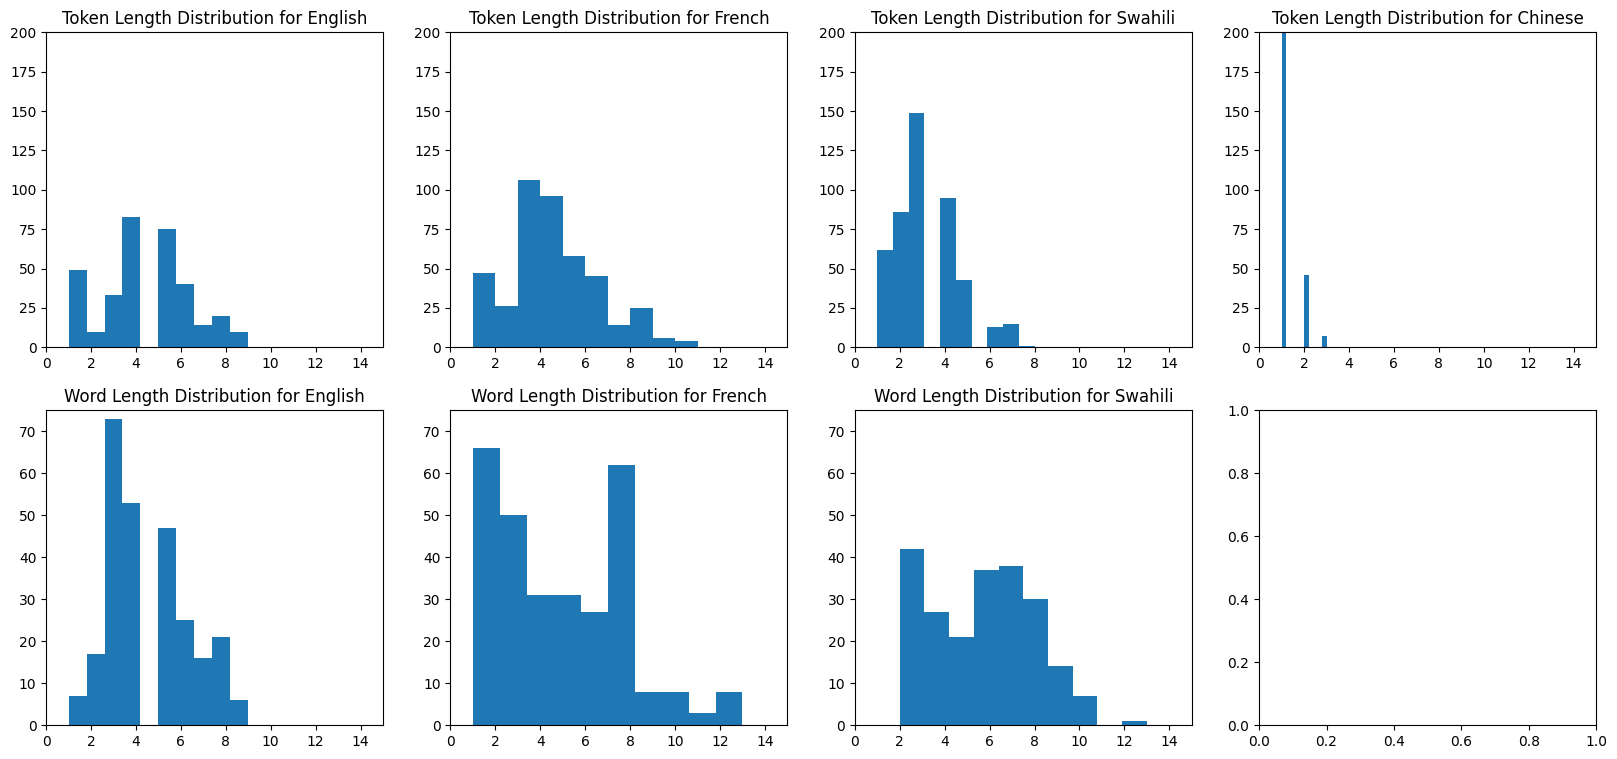

In [20]:
import matplotlib.pyplot as plt

def plot_token_length_histogram(text, language_name):
    encoding = tiktoken.encoding_for_model('gpt-4o')
    tokens = encoding.encode(text)

    decoded_tokens = [encoding.decode([t]) for t in tokens]
    token_lengths = [len(t) for t in decoded_tokens]
    plt.hist(token_lengths, bins=10)
    plt.title(f'Token Length Distribution for {language_name}')
    plt.xlim([0,15])
    plt.ylim([0,200])

def plot_word_length_histogram(text, language_name):
    if language != 'Chinese':
        word_lengths = [len(t) for t in text.split()]
        plt.hist(word_lengths, bins=10)
        plt.title(f'Word Length Distribution for {language_name}')
        plt.xlim([0,15])
        plt.ylim([0,75])

plt.figure(figsize=(20, 9))

for i, language in enumerate(['English', 'French', 'Swahili', 'Chinese']):
    # Token length histograms
    plt.subplot(2, 4, 1 + i)
    plot_token_length_histogram(excerpts[language], language)

    # Word length histograms
    plt.subplot(2, 4, 5 + i)
    plot_word_length_histogram(excerpts[language], language)